<a href="https://colab.research.google.com/github/JadeGome/stock/blob/main/AlphaAdvantage_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
def stocks(ticker=True):
  URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+ticker+'&apikey=2VD17WDC3A2XXZHP'
  r = requests.get(URL)
  data = r.json()
  df = pd.DataFrame.from_dict(data['Weekly Time Series'], orient= 'index')
  df=df.rename(columns={"1. open" :"open","2. high":"high","3. low":"low","4. close":"close","5. volume":"volume"})
  df.reset_index(inplace=True)
  df.rename(columns = {'index':'Date'}, inplace=True)
  df['Date']= pd.to_datetime(df['Date'])
  df['ticker']=ticker
  return df
  


In [2]:
Stock=stocks(ticker='A')
Stock.dtypes
column_names=Stock.columns
for i in column_names[1:6]:
  Stock[i]=Stock[i].astype('float')

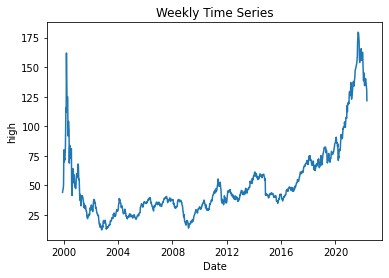

In [3]:
import matplotlib.pyplot as plt

plt.plot(Stock['Date'],Stock['high'])
plt.title ('Weekly Time Series')
plt.xlabel ('Date')
plt.ylabel ('high')
plt.show()
